## Data Science Capstone Project

This notebook will be mainly used for IBM Data Science Capstone project

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Downloading Data and creating initial Dataset

In [2]:
# Downloading dataset from Google Drive
!wget -O Data-Collisions.csv 'https://drive.google.com/uc?export=download&id=1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO'

--2020-09-25 01:53:39--  https://drive.google.com/uc?export=download&id=1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO
Resolving drive.google.com (drive.google.com)... 172.217.1.238, 2607:f8b0:4000:803::200e
Connecting to drive.google.com (drive.google.com)|172.217.1.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j20d6a50sl1jaip5kfnehis5jci5dg94/1600998750000/18116944513271652786/*/1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO?e=download [following]
--2020-09-25 01:53:43--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/j20d6a50sl1jaip5kfnehis5jci5dg94/1600998750000/18116944513271652786/*/1Y3X4xYrUVtkhTRD6wQZ5aDtf1CgzKWVO?e=download
Resolving doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googleusercontent.com)... 172.217.9.1, 2607:f8b0:4000:806::2001
Connecting to doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googl

In [2]:
#Reading initial dataset
initial_df = pd.read_csv('Data-Collisions.csv')
initial_df.head()

C:\Users\delsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Cleaning Data - removing all non-relevant records

In [3]:
# First - remove all empty rows, if any
initial_df = initial_df.dropna(how = 'all')

# Remove all duplicates
initial_df.drop_duplicates()

# Replacing all NaN values by 0
initial_df = initial_df.fillna(0)

# Removing all non-vehicle cases
initial_df.drop(initial_df[initial_df['VEHCOUNT'] < 1].index, inplace = True)

initial_df = initial_df.drop(initial_df[(initial_df['SDOT_COLCODE'] == 2) | (initial_df['SDOT_COLCODE'] > 29)].index)
initial_df = initial_df.drop(initial_df[(initial_df['SDOT_COLCODE'] > 4) & (initial_df['SDOT_COLCODE'] < 10)].index)

# Removing all cases with one parked vehicle
initial_df = initial_df.drop(initial_df[(initial_df['VEHCOUNT'] == 1) & (initial_df['HITPARKEDCAR'] == 'Y')].index)

# Removing all cases related to driver influence (not related to Weather)
initial_df = initial_df.drop(initial_df[(initial_df['UNDERINFL'] == 1) | (initial_df['UNDERINFL']== 'Y')].index)
initial_df = initial_df.drop(initial_df[(initial_df['INATTENTIONIND'] == 1) | (initial_df['INATTENTIONIND']== 'Y')].index)
initial_df = initial_df.drop(initial_df[(initial_df['SPEEDING'] == 1) | (initial_df['SPEEDING']== 'Y')].index)

# Remove Unknown weather conditions
initial_df.drop(initial_df[(initial_df['WEATHER'] == 'Unknown') | (initial_df['WEATHER'] == 'Other') | (initial_df['WEATHER'] == 0)].index, inplace = True)
initial_df.drop(initial_df[(initial_df['ROADCOND'] == 'Unknown') | (initial_df['ROADCOND'] == 'Other') | (initial_df['ROADCOND'] == 0)].index, inplace = True)
initial_df.drop(initial_df[(initial_df['LIGHTCOND'] == 'Unknown') | (initial_df['LIGHTCOND'] == 'Other') | (initial_df['LIGHTCOND'] == 0)].index, inplace = True)

# Look at the prepared initial dataset shape
initial_df.shape

(127273, 38)

In [4]:
# Remove all unnecessary columns
initial_df = initial_df.drop(['X',
                              'Y',
                              'INCKEY',
                              'COLDETKEY',
                              'REPORTNO',
                              'STATUS',
                              'INTKEY',
                              'LOCATION',
                              'PEDROWNOTGRNT',
                              'SDOTCOLNUM',
                              'SEGLANEKEY',
                              'CROSSWALKKEY',
                              'EXCEPTRSNCODE',
                              'EXCEPTRSNDESC',
                              'SEVERITYDESC',
                              'SEVERITYCODE.1',
                              'ST_COLDESC',
                              'SDOT_COLDESC',
                              'INCDATE',
                              'ST_COLCODE',
                              'JUNCTIONTYPE',
                              'COLLISIONTYPE',
                              'INATTENTIONIND',
                              'SPEEDING',
                              'UNDERINFL',
                              'VEHCOUNT',
                              'PEDCYLCOUNT',
                              'PEDCOUNT',
                              'PERSONCOUNT',
                              'ADDRTYPE',
                              'OBJECTID',
                              'HITPARKEDCAR',
                              'SDOT_COLCODE'], 1)

initial_df.head()

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight
1,1,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On
2,1,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight
3,1,3/29/2013 9:26:00 AM,Clear,Dry,Daylight
4,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight


## Data Analysis
Let's look at the incidents per hour  
For that purpose we will change Date and Time of incidents to Hour of the day only and also will update AM / PM to 24 hours.

In [5]:
# Removing Date and moving to 24 hours
initial_df['INCDTTM'] = initial_df.INCDTTM.str.split(' ')

def change_time(column):
    if isinstance(column, list) and len(column) == 3:
        time = column[1].split(':')[0]
        if column[2] == 'PM' and time != '12':
            time = str(int(time) + 12)
        if column[2] == 'AM' and time == '12':
            time = '0'
        column = time
    if isinstance(column, list) and len(column) < 3:
        column = str(25)
    return int(column)

initial_df['INCDTTM'] = initial_df['INCDTTM'].apply(lambda x: change_time(x))

# Let's look at the updated dataset
initial_df.head()

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND
0,2,14,Overcast,Wet,Daylight
1,1,18,Raining,Wet,Dark - Street Lights On
2,1,10,Overcast,Dry,Daylight
3,1,9,Clear,Dry,Daylight
4,2,8,Raining,Wet,Daylight


### Let's look at the average hours of incidents per day

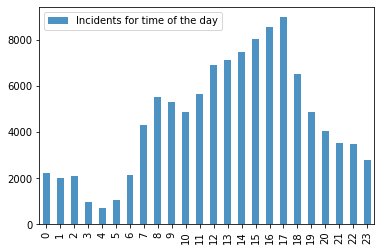

In [6]:
# Let's look at the time of incidents per day
timeoftheday_df = initial_df
timeoftheday_df.drop(timeoftheday_df[timeoftheday_df['INCDTTM'] == 25].index, inplace = True)

order = [i for i in range(0,24)]
ax = timeoftheday_df.INCDTTM.value_counts().loc[order].plot(kind='bar', alpha=0.8)
ax.legend(['Incidents for time of the day'])

In [50]:
timeoftheday_df.WEATHER.value_counts()

Clear                       70478
Raining                     20427
Overcast                    17080
Snowing                       497
Fog/Smog/Smoke                352
Sleet/Hail/Freezing Rain       62
Blowing Sand/Dirt              31
Severe Crosswind               20
Partly Cloudy                   5
Name: WEATHER, dtype: int64

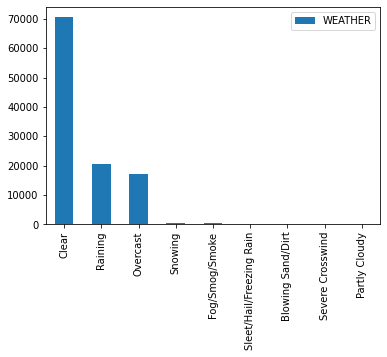

In [51]:
a1 = timeoftheday_df.WEATHER.value_counts().plot(kind='bar')
a1.legend(['WEATHER'])

In [52]:
timeoftheday_df.ROADCOND.value_counts()

Dry               78754
Wet               28983
Ice                 601
Snow/Slush          483
Oil                  46
Sand/Mud/Dirt        44
Standing Water       41
Name: ROADCOND, dtype: int64

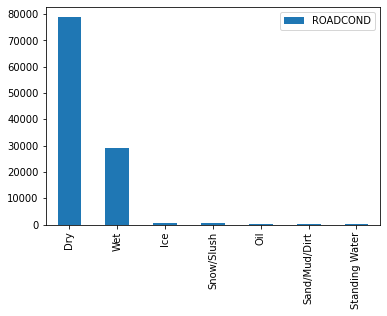

In [53]:
a2 = timeoftheday_df.ROADCOND.value_counts().plot(kind='bar')
a2.legend(['ROADCOND'])

In [54]:
timeoftheday_df.LIGHTCOND.value_counts()

Daylight                    73416
Dark - Street Lights On     28809
Dusk                         3639
Dawn                         1506
Dark - No Street Lights       903
Dark - Street Lights Off      672
Dark - Unknown Lighting         7
Name: LIGHTCOND, dtype: int64

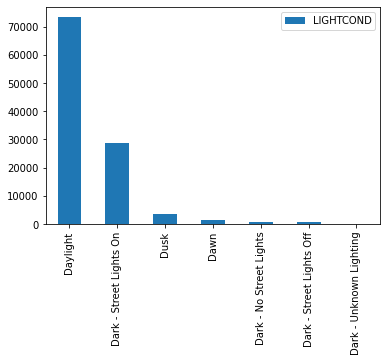

In [55]:
a3 = timeoftheday_df.LIGHTCOND.value_counts().plot(kind='bar')
a3.legend(['LIGHTCOND'])

C:\Users\delsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


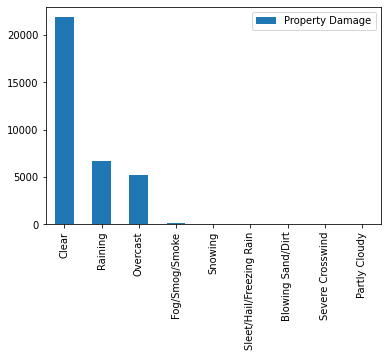

In [56]:
super_1_df = timeoftheday_df[['SEVERITYCODE', 'WEATHER']]
super_1_df.drop(super_1_df[super_1_df['SEVERITYCODE'] == 1].index, inplace = True)
a4 = super_1_df.WEATHER.value_counts().plot(kind='bar')
a4.legend(['Property Damage'])

C:\Users\delsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


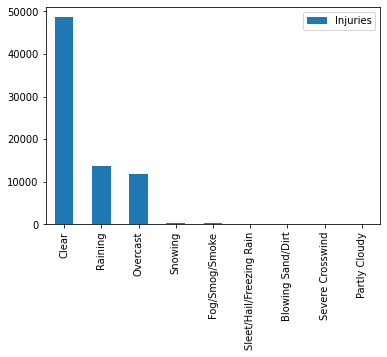

In [57]:
super_2_df = timeoftheday_df[['SEVERITYCODE', 'WEATHER']]
super_2_df.drop(super_2_df[super_2_df['SEVERITYCODE'] == 2].index, inplace = True)
a5 = super_2_df.WEATHER.value_counts().plot(kind='bar')
a5.legend(['Injuries'])

Severity Code for Raining weather conditions


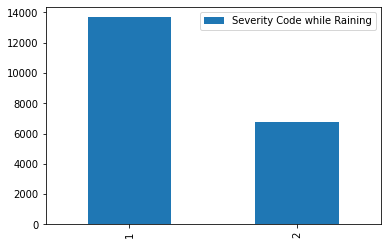

In [58]:
super_3_df = timeoftheday_df[['SEVERITYCODE', 'WEATHER']]
super_3_df.drop(super_3_df[super_3_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Severity Code for Raining weather conditions')
ax2 = super_3_df.SEVERITYCODE.value_counts().plot(kind='bar')
ax2.legend(['Severity Code while Raining'])

Light Conditions for Raining weather conditions


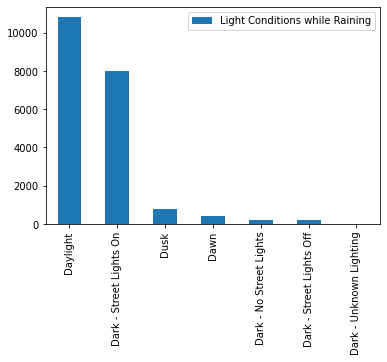

In [59]:
super_4_df = timeoftheday_df[['LIGHTCOND', 'WEATHER']]
super_4_df.drop(super_4_df[super_4_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Light Conditions for Raining weather conditions')
ax3 = super_4_df.LIGHTCOND.value_counts().plot(kind='bar')
ax3.legend(['Light Conditions while Raining'])

Road Conditions for Raining weather conditions


C:\Users\delsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


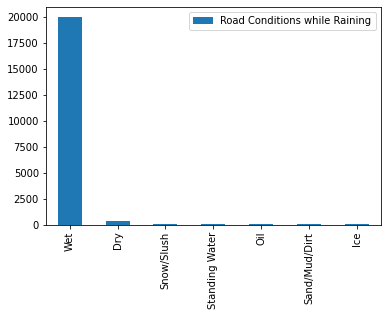

In [377]:
super_5_df = timeoftheday_df[['ROADCOND', 'WEATHER']]
super_5_df.drop(super_5_df[super_5_df['WEATHER'] != 'Raining'].index, inplace = True)
print('Road Conditions for Raining weather conditions')
ax4 = super_5_df.ROADCOND.value_counts().plot(kind='bar')
ax4.legend(['Road Conditions while Raining'])

Road Conditions for Snowing weather conditions


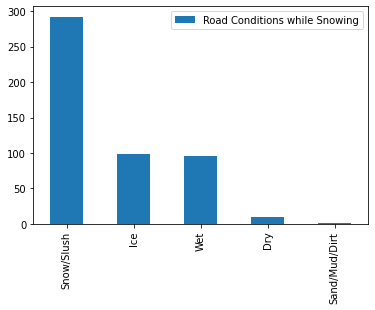

In [61]:
super_5_df = timeoftheday_df[['ROADCOND', 'WEATHER']]
super_5_df.drop(super_5_df[super_5_df['WEATHER'] != 'Snowing'].index, inplace = True)
print('Road Conditions for Snowing weather conditions')
ax5 = super_5_df.ROADCOND.value_counts().plot(kind='bar')
ax5.legend(['Road Conditions while Snowing'])

In [62]:
timeoftheday_df.shape

(108952, 5)

Let's look at the incident time for each weather

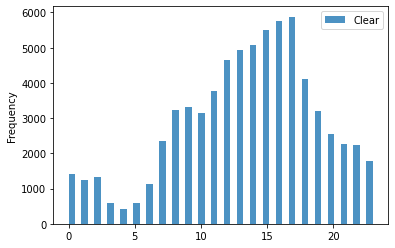

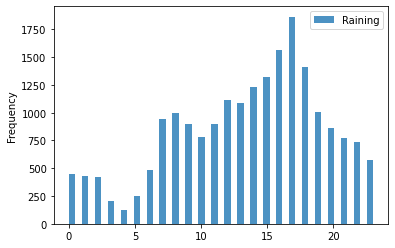

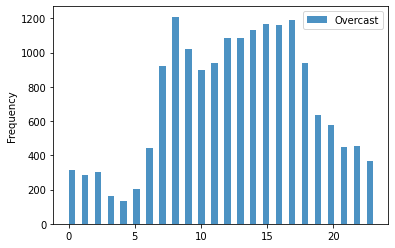

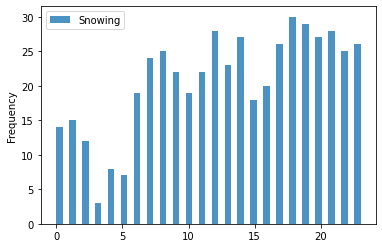

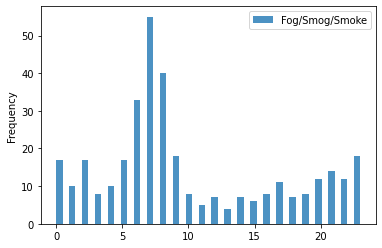

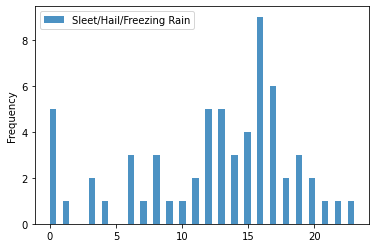

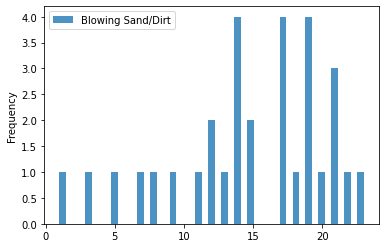

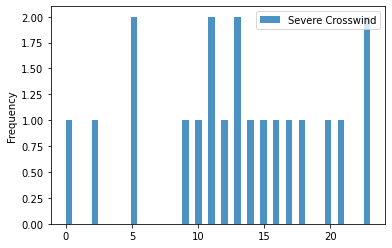

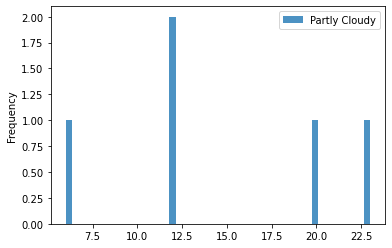

In [64]:
# Let's look at the incident time for each weather
timeoftheday_weather_df = timeoftheday_df[['INCDTTM', 'WEATHER']]

for weather in ['Clear', 'Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy']:
    timeoftheday_overcast_df = timeoftheday_weather_df
    timeoftheday_overcast_df = timeoftheday_overcast_df[timeoftheday_overcast_df['WEATHER'] == weather]
    ax7 = timeoftheday_overcast_df.plot(kind='hist', bins=47, alpha=0.8)
    ax7.legend([weather])

#### Let's create a view for the same representationof the most used cases for Road Condition and Light Conditions

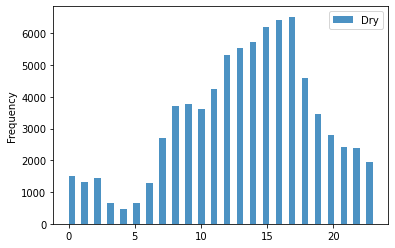

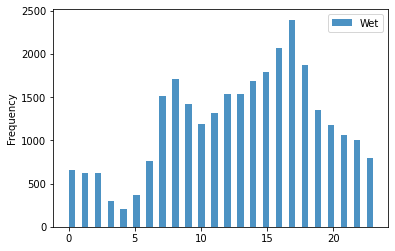

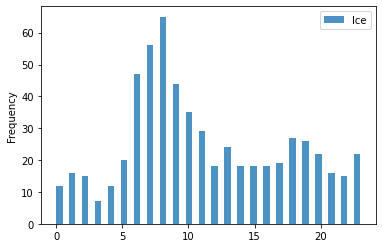

In [70]:
timeoftheday_weather_df = timeoftheday_df[['INCDTTM', 'ROADCOND']]

for road_cond in ['Dry', 'Wet', 'Ice']:
    timeoftheday_overcast_df = timeoftheday_weather_df
    timeoftheday_overcast_df = timeoftheday_overcast_df[timeoftheday_overcast_df['ROADCOND'] == road_cond]
    ax = timeoftheday_overcast_df.plot(kind='hist', bins=47, alpha=0.8)
    ax.legend([road_cond])

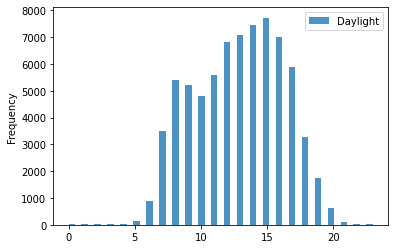

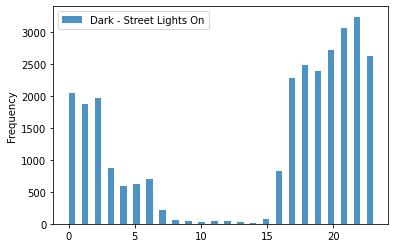

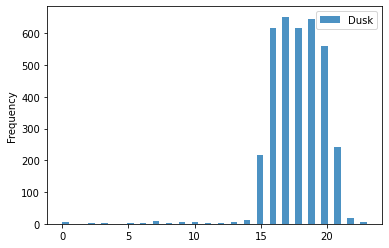

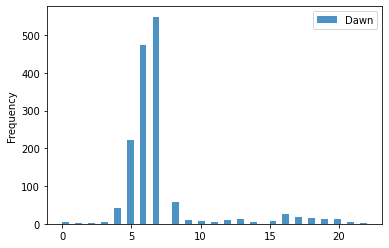

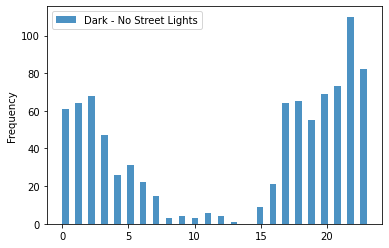

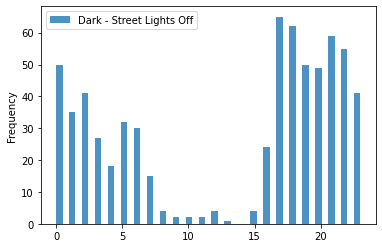

In [74]:
timeoftheday_weather_df = timeoftheday_df[['INCDTTM', 'LIGHTCOND']]

for light_cond in ['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off']:
    timeoftheday_overcast_df = timeoftheday_weather_df
    timeoftheday_overcast_df = timeoftheday_overcast_df[timeoftheday_overcast_df['LIGHTCOND'] == light_cond]
    ax = timeoftheday_overcast_df.plot(kind='hist', bins=47, alpha=0.8)
    ax.legend([light_cond])

## Preparing Data - update Dataset for the balanced one

Let's look at the counts of our data

In [7]:
timeoftheday_df.SEVERITYCODE.value_counts()

1    74879
2    34073
Name: SEVERITYCODE, dtype: int64

Now we could use Oversampling (Up-sampling) of the minority cases, so our dataset would be ballanced

In [8]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = timeoftheday_df[timeoftheday_df['SEVERITYCODE'] == 1]
df_minority = timeoftheday_df[timeoftheday_df['SEVERITYCODE'] == 2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,        # sample with replacement
                                 n_samples=74879,     # to match majority class
                                 random_state=123)    # reproducible results
 
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

Let's look at the ballanced dataset

In [9]:
 
# Display new class counts
df_balanced.SEVERITYCODE.value_counts()

2    74879
1    74879
Name: SEVERITYCODE, dtype: int64

### Now our dataset is perfectly balanced!

# Model creation 

## K-Nearest Neighbors

## Label encoding

In [372]:
X = df_balanced[['INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

array([[18, 'Raining', 'Wet', 'Dark - Street Lights On'],
       [10, 'Overcast', 'Dry', 'Daylight'],
       [9, 'Clear', 'Dry', 'Daylight'],
       [17, 'Clear', 'Dry', 'Daylight'],
       [13, 'Clear', 'Dry', 'Daylight']], dtype=object)

In [373]:
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear','Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
X[:,1] = le_weather.transform(X[:,1]) 


le_road_cond = preprocessing.LabelEncoder()
le_road_cond.fit(['Dry', 'Wet', 'Ice', 'Snow/Slush', 'Oil', 'Sand/Mud/Dirt', 'Standing Water'])
X[:,2] = le_road_cond.transform(X[:,2])


le_light_cond = preprocessing.LabelEncoder()
le_light_cond.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting'])
X[:,3] = le_light_cond.transform(X[:,3]) 

X[0:5]

array([[18, 5, 6, 2],
       [10, 3, 0, 5],
       [9, 1, 0, 5],
       [17, 1, 0, 5],
       [13, 1, 0, 5]], dtype=object)

In [374]:
y = df_balanced['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Let's normalize the data.  
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases

In [375]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.85,  1.76,  1.63, -1.54],
       [-0.64,  0.54, -0.62,  0.58],
       [-0.82, -0.68, -0.62,  0.58],
       [ 0.66, -0.68, -0.62,  0.58],
       [-0.08, -0.68, -0.62,  0.58]])

### Train Test Split

In [376]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (119806, 4) (119806,)
Test set: (29952, 4) (29952,)


In [202]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.5227363782051282 with k = 21


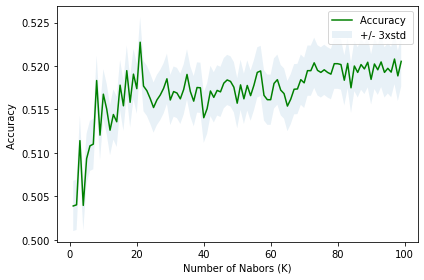

In [205]:
# Plot model accuracy for Different number of Neighbors
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [206]:
k = 21
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

# we can use the model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:10]

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64)

In [207]:
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5232709547101146
Test set Accuracy:  0.5227363782051282


## Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier
X = df_balanced[['INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values

from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear','Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
X[:,1] = le_weather.transform(X[:,1]) 


le_road_cond = preprocessing.LabelEncoder()
le_road_cond.fit(['Dry', 'Wet', 'Ice', 'Snow/Slush', 'Oil', 'Sand/Mud/Dirt', 'Standing Water'])
X[:,2] = le_road_cond.transform(X[:,2])


le_light_cond = preprocessing.LabelEncoder()
le_light_cond.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting'])
X[:,3] = le_light_cond.transform(X[:,3]) 

X[0:5]

array([[18, 5, 6, 2],
       [10, 3, 0, 5],
       [9, 1, 0, 5],
       [17, 1, 0, 5],
       [13, 1, 0, 5]], dtype=object)

In [11]:
y = df_balanced["SEVERITYCODE"]
y[0:5]

1    1
2    1
3    1
5    1
8    1
Name: SEVERITYCODE, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.4, random_state=3)
print(X_trainset.shape)
print(y_trainset.shape)

(89854, 4)
(89854,)


In [13]:
scTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
scTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [14]:
scTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [15]:
predTree = scTree.predict(X_testset)

In [16]:
print (predTree [0:5])
print (y_testset [0:5])

[2 1 1 1 2]
44714     1
163531    2
151105    2
108293    2
147192    1
Name: SEVERITYCODE, dtype: int64


In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.5239549946581197


Let's find out the best parameters for Decision Tree model

In [188]:
from sklearn.model_selection import GridSearchCV
params_dtc = {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 75, 100]
             }

t = GridSearchCV(DecisionTreeClassifier(), params_dtc)
t.fit(X_trainset, y_trainset)

print("The best accuaracy was ", t.best_score_," with parameters: ", t.best_params_)

The best accuaracy was  0.530961329616345  with parameters:  {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'splitter': 'random'}


In [21]:
model_dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 50, max_features = 'auto', splitter = 'random')
model_dtc.fit(X_trainset, y_trainset)
dtc_predict = model_dtc.predict(X_testset)

print("Accuracy is : ", metrics.accuracy_score(y_testset, dtc_predict)," with parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'splitter': 'random'}")

Accuracy is :  0.5316339476495726  with parameters: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'splitter': 'random'}


In [23]:
scTree_best = DecisionTreeClassifier(criterion="entropy", max_depth = 50, max_features='auto', splitter='random')
scTree_best.fit(X_trainset, y_trainset)
predTree_best = scTree_best.predict(X_testset)

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree_best))

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
dt_f1 = f1_score(y_testset, predTree_best, average='weighted')
dt_js = jaccard_score(y_testset, predTree_best)
print('DT F1-score:', dt_f1)
print('DT Jaccard:', dt_js)

DecisionTrees's Accuracy:  0.5317508012820513
DT F1-score: 0.5245038928753596
DT Jaccard: 0.3045914319714399


In [198]:
exact = 0
for i in range(len(dtc_predict)):
    if dtc_predict[i] == y_testset.values[i]:
        exact += 1
print("exact", exact)
accuracy = exact / len(dtc_predict)
print("accuracy", accuracy)

exact 31855
accuracy 0.5317674946581197


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.835999 to fit



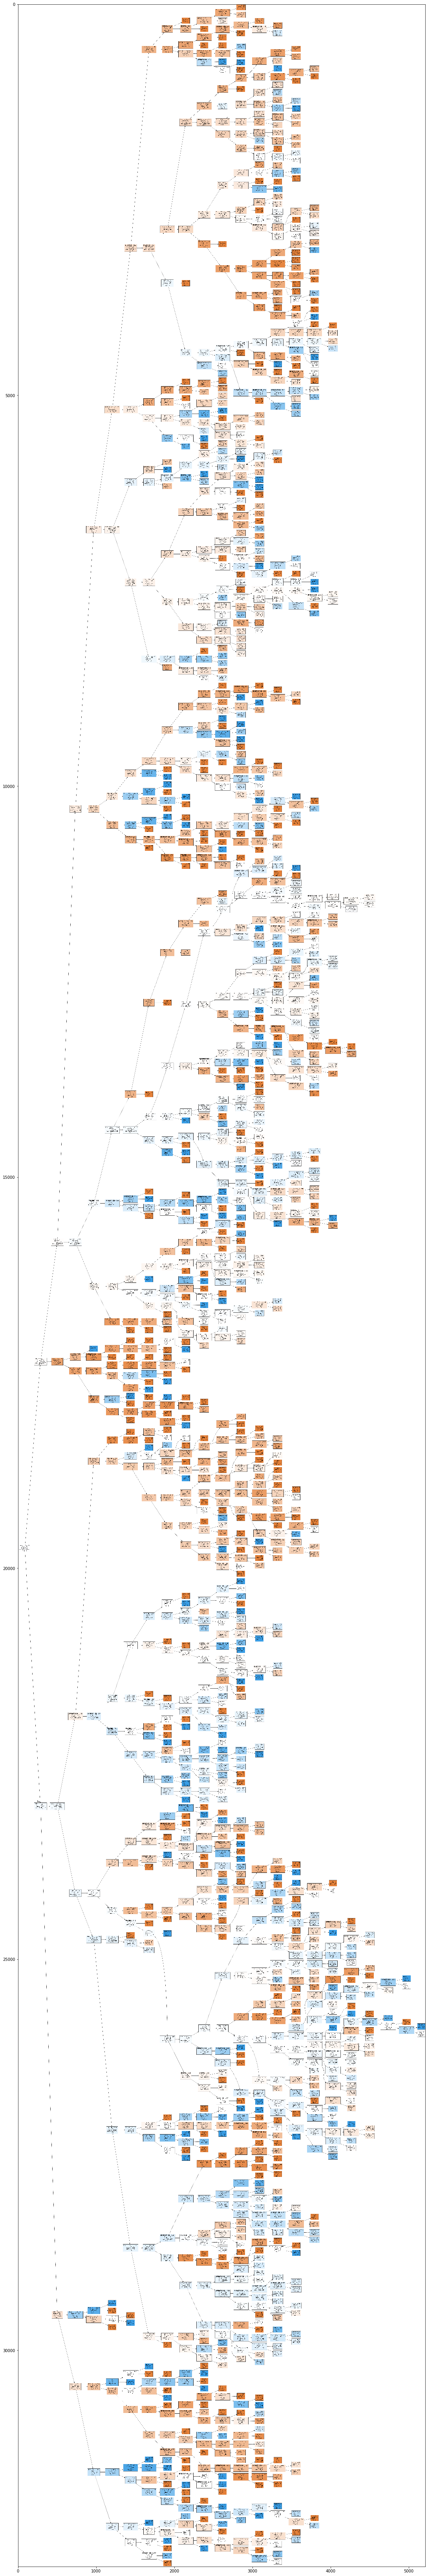

In [201]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\delsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\Graphviz\bin'
%matplotlib inline 

dot_data = StringIO()
filename = "sctree.png"
featureNames = df_balanced.columns[0:4]
targetNames = df_balanced["SEVERITYCODE"].unique().tolist()
for i in range(len(targetNames)):
    targetNames[i] = str(targetNames[i])
out = tree.export_graphviz(model_dtc, feature_names=featureNames, out_file=dot_data, class_names = targetNames, filled=True, special_characters=True, rotate=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(60, 120))
plt.imshow(img, interpolation='nearest')

## Logistic Regression

In [153]:
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [154]:
X = np.asarray(df_balanced[['INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']])
X[0:5]

array([[18, 'Raining', 'Wet', 'Dark - Street Lights On'],
       [10, 'Overcast', 'Dry', 'Daylight'],
       [9, 'Clear', 'Dry', 'Daylight'],
       [17, 'Clear', 'Dry', 'Daylight'],
       [13, 'Clear', 'Dry', 'Daylight']], dtype=object)

In [157]:
X = df_balanced[['INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values

from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear','Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
X[:,1] = le_weather.transform(X[:,1]) 


le_road_cond = preprocessing.LabelEncoder()
le_road_cond.fit(['Dry', 'Wet', 'Ice', 'Snow/Slush', 'Oil', 'Sand/Mud/Dirt', 'Standing Water'])
X[:,2] = le_road_cond.transform(X[:,2])


le_light_cond = preprocessing.LabelEncoder()
le_light_cond.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting'])
X[:,3] = le_light_cond.transform(X[:,3]) 

X[0:5]

array([[18, 5, 6, 2],
       [10, 3, 0, 5],
       [9, 1, 0, 5],
       [17, 1, 0, 5],
       [13, 1, 0, 5]], dtype=object)

In [155]:
y = np.asarray(df_balanced['SEVERITYCODE'])
y [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [24]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.84882915,  1.76200583,  1.63341126, -1.54202995],
       [-0.63704509,  0.54073793, -0.61791891,  0.58168476],
       [-0.82277937, -0.68052996, -0.61791891,  0.58168476],
       [ 0.66309487, -0.68052996, -0.61791891,  0.58168476],
       [-0.07984225, -0.68052996, -0.61791891,  0.58168476]])

In [25]:
from sklearn.model_selection import train_test_split
X_trn, X_tst, y_trn, y_tst = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_trn.shape,  y_trn.shape)
print ('Test set:', X_tst.shape,  y_tst.shape)

Train set: (119806, 4) (119806,)
Test set: (29952, 4) (29952,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trn, y_trn)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [27]:
yhat = LR.predict(X_tst)
yhat_prob = LR.predict_proba(X_tst)

In [30]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
lr_js = jaccard_score(y_tst, yhat)
lr_f1 = f1_score(y_tst, yhat, average='weighted')
print('LR F1-score:', lr_f1)
print('LR Jaccard:', lr_js)

LR F1-score: 0.5175808164699814
LR Jaccard: 0.30848391148903276


In [179]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_tst, yhat, labels=[2,1]))

[[9254 5680]
 [8633 6385]]


Confusion matrix, without normalization
[[9254 5680]
 [8633 6385]]


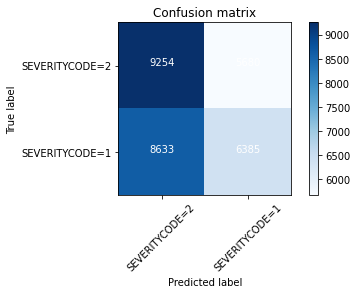

In [181]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_tst, yhat, labels=[2,1])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITYCODE=2','SEVERITYCODE=1'], normalize= False,  title='Confusion matrix')

In [182]:
print (classification_report(y_tst, yhat))

              precision    recall  f1-score   support

           1       0.53      0.43      0.47     15018
           2       0.52      0.62      0.56     14934

    accuracy                           0.52     29952
   macro avg       0.52      0.52      0.52     29952
weighted avg       0.52      0.52      0.52     29952



In [183]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6951982722962475

Let's find out the best parameters for Logistic Regression

In [187]:
from sklearn.model_selection import GridSearchCV
params_lr = {
            #'penalty': ['l1','l2','elasticnet','none'],
            'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter': [100, 250, 500, 750, 1000],
            'C': [1, 0.9, 0.7, 0.5, 0.3, 0.2, 0.1, 0.01, 0.001]
            }
t = GridSearchCV(LogisticRegression(), params_lr)
t.fit(X_trn, y_trn)

print("The best accuaracy was ", t.best_score_," with parameters: ", t.best_params_)

The best accuaracy was  0.5206583925236912  with parameters:  {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


In [189]:
model_lr = LogisticRegression(solver='lbfgs', C=1, max_iter=100) 
model_lr.fit(X_trn, y_trn)
lr_predict = model_lr.predict(X_tst)
print("Accuracy is : ", metrics.accuracy_score(y_tst, lr_predict)," with parameters:  {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}")

Accuracy is :  0.5221020299145299  with parameters:  {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


In [335]:
#Reading initial dataset
initial_drv_df = pd.read_csv('Data-Collisions.csv')
initial_drv_df.head()

C:\Users\delsa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [336]:
# First - remove all empty rows, if any
initial_drv_df = initial_drv_df.dropna(how = 'all')

# Remove all duplicates
initial_drv_df.drop_duplicates()

# Replacing all NaN values by 0
initial_drv_df = initial_drv_df.fillna(0)

# Removing all non-vehicle cases
initial_drv_df.drop(initial_drv_df[initial_drv_df['VEHCOUNT'] < 1].index, inplace = True)

initial_drv_df = initial_drv_df.drop(initial_drv_df[(initial_drv_df['SDOT_COLCODE'] == 2) | (initial_drv_df['SDOT_COLCODE'] > 29)].index)
initial_drv_df = initial_drv_df.drop(initial_drv_df[(initial_drv_df['SDOT_COLCODE'] > 4) & (initial_drv_df['SDOT_COLCODE'] < 10)].index)

# Removing all cases with one parked vehicle
initial_drv_df = initial_drv_df.drop(initial_drv_df[(initial_drv_df['VEHCOUNT'] == 1) & (initial_drv_df['HITPARKEDCAR'] == 'Y')].index)

# Removing all cases not related to driver influence
initial_drv_df = initial_drv_df.drop(initial_drv_df[
                                        ((initial_drv_df['UNDERINFL'] == 0) | (initial_drv_df['UNDERINFL'] == 'N')) &
                                        ((initial_drv_df['INATTENTIONIND'] == 0) | (initial_drv_df['INATTENTIONIND'] == 'N')) &
                                        ((initial_drv_df['SPEEDING'] == 0) | (initial_drv_df['SPEEDING'] == 'N'))
                                       ].index)

# Look at the prepared initial dataset shape
initial_drv_df.shape

(111573, 38)

In [337]:
# Remove all unnecessary columns
initial_drv_df = initial_drv_df.drop(['X',
                              'Y',
                              'INCKEY',
                              'COLDETKEY',
                              'REPORTNO',
                              'STATUS',
                              'INTKEY',
                              'LOCATION',
                              'PEDROWNOTGRNT',
                              'SDOTCOLNUM',
                              'SEGLANEKEY',
                              'CROSSWALKKEY',
                              'EXCEPTRSNCODE',
                              'EXCEPTRSNDESC',
                              'SEVERITYDESC',
                              'SEVERITYCODE.1',
                              'ST_COLDESC',
                              'SDOT_COLDESC',
                              'INCDATE',
                              'ST_COLCODE',
                              'JUNCTIONTYPE',
                              'COLLISIONTYPE',
                              'VEHCOUNT',
                              'PEDCYLCOUNT',
                              'PEDCOUNT',
                              'PERSONCOUNT',
                              'ADDRTYPE',
                              'OBJECTID',
                              'HITPARKEDCAR',
                              'SDOT_COLCODE'], 1)

initial_drv_df.head()

,SEVERITYCODE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,1,12/20/2006 6:55:00 PM,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,11/18/2004 10:20:00 AM,0,0,Overcast,Dry,Daylight,0
4,2,1/28/2004 8:04:00 AM,0,0,Raining,Wet,Daylight,0
6,1,12/9/2008,0,0,Raining,Wet,Daylight,0
8,1,6/15/2006 1:00:00 PM,0,0,Clear,Dry,Daylight,0


In [338]:
# Removing Date and moving to 24 hours
initial_drv_df['INCDTTM'] = initial_drv_df.INCDTTM.str.split(' ')

def change_time(column):
    if isinstance(column, list) and len(column) == 3:
        time = column[1].split(':')[0]
        if column[2] == 'PM' and time != '12':
            time = str(int(time) + 12)
        if column[2] == 'AM' and time == '12':
            time = '0'
        column = time
    if isinstance(column, list) and len(column) < 3:
        column = str(25)
    return int(column)

initial_drv_df['INCDTTM'] = initial_drv_df['INCDTTM'].apply(lambda x: change_time(x))

# Let's look at the updated dataset
initial_drv_df.head()

,SEVERITYCODE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,1,18,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,10,0,0,Overcast,Dry,Daylight,0
4,2,8,0,0,Raining,Wet,Daylight,0
6,1,25,0,0,Raining,Wet,Daylight,0
8,1,13,0,0,Clear,Dry,Daylight,0


In [339]:
# Replacing all 'Y' to 1 and 'N' to 0
def replace_y(column):
    if str(column) == 'Y' or str(column) == '1':
        column = 1
    else:
        column = 0
    return int(column)

initial_drv_df['UNDERINFL'] = initial_drv_df['UNDERINFL'].apply(lambda x: replace_y(x))
initial_drv_df['INATTENTIONIND'] = initial_drv_df['INATTENTIONIND'].apply(lambda x: replace_y(x))
initial_drv_df['SPEEDING'] = initial_drv_df['SPEEDING'].apply(lambda x: replace_y(x))
# Let's look at the updated dataset
initial_drv_df.head()

,SEVERITYCODE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
1,1,18,0,0,Raining,Wet,Dark - Street Lights On,0
2,1,10,0,0,Overcast,Dry,Daylight,0
4,2,8,0,0,Raining,Wet,Daylight,0
6,1,25,0,0,Raining,Wet,Daylight,0
8,1,13,0,0,Clear,Dry,Daylight,0


In [289]:
initial_drv_df.UNDERINFL.value_counts()

0    102516
1      9057
Name: UNDERINFL, dtype: int64

In [307]:
initial_drv_df.INATTENTIONIND.value_counts()

0    82087
1    29486
Name: INATTENTIONIND, dtype: int64

In [291]:
initial_drv_df.SPEEDING.value_counts()

0    102306
1      9267
Name: SPEEDING, dtype: int64

### Driver Uner Influence

In [298]:
initial_drv_df.UNDERINFL.value_counts()

1    7860
Name: UNDERINFL, dtype: int64

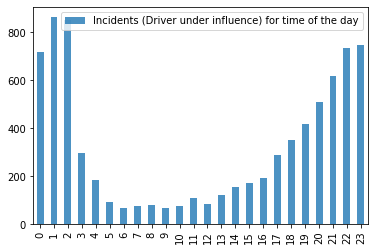

In [292]:
timeoftheday_drv_infl_df = initial_drv_df
timeoftheday_drv_infl_df.drop(timeoftheday_drv_infl_df[timeoftheday_drv_infl_df['UNDERINFL'] < 1].index, inplace = True)
timeoftheday_drv_infl_df.drop(timeoftheday_drv_infl_df[timeoftheday_drv_infl_df['INCDTTM'] == 25].index, inplace = True)

order = [i for i in range(0,24)]
ax = timeoftheday_drv_infl_df.INCDTTM.value_counts().loc[order].plot(kind='bar', alpha=0.8)
ax.legend(['Incidents (Driver under influence) for time of the day'])

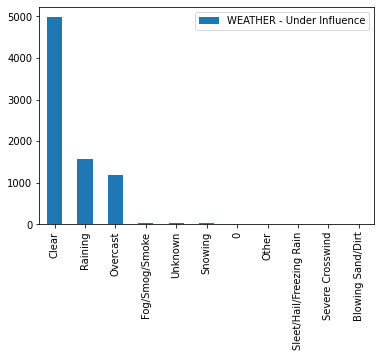

In [293]:
ax = timeoftheday_drv_infl_df.WEATHER.value_counts().plot(kind='bar')
ax.legend(['WEATHER - Under Influence'])

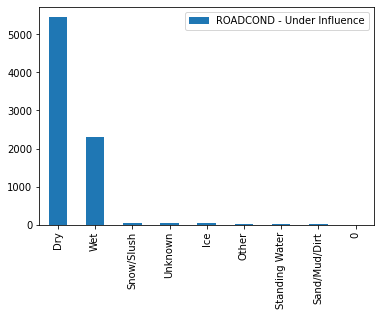

In [294]:
ax = timeoftheday_drv_infl_df.ROADCOND.value_counts().plot(kind='bar')
ax.legend(['ROADCOND - Under Influence'])

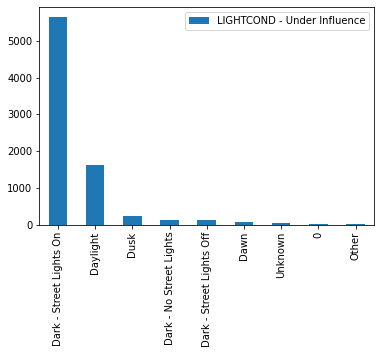

In [295]:
ax = timeoftheday_drv_infl_df.LIGHTCOND.value_counts().plot(kind='bar')
ax.legend(['LIGHTCOND - Under Influence'])

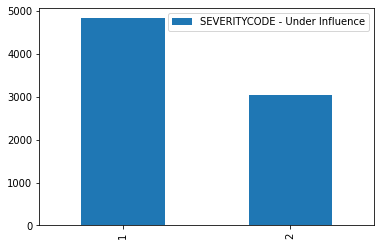

In [296]:
ax = timeoftheday_drv_infl_df.SEVERITYCODE.value_counts().plot(kind='bar')
ax.legend(['SEVERITYCODE - Under Influence'])

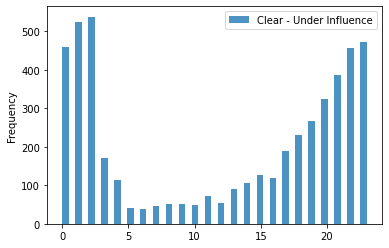

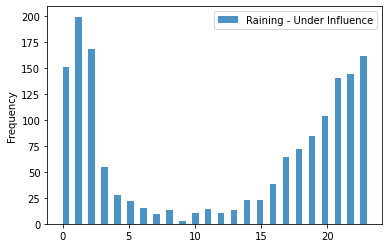

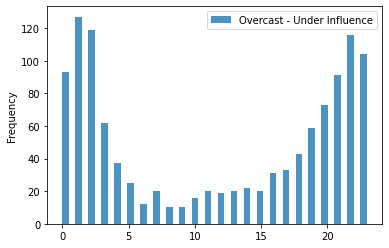

In [297]:
# Let's look at the incident time for each weather
timeoftheday_weather_drv_df = timeoftheday_drv_infl_df[['INCDTTM', 'WEATHER']]

for weather in ['Clear', 'Raining', 'Overcast']:
    timeoftheday_wthr_drv_df = timeoftheday_weather_drv_df
    timeoftheday_wthr_drv_df = timeoftheday_wthr_drv_df[timeoftheday_wthr_drv_df['WEATHER'] == weather]
    ax7 = timeoftheday_wthr_drv_df.plot(kind='hist', bins=47, alpha=0.8)
    ax7.legend([weather + ' - Under Influence'])

### Driver with inattention

In [308]:
initial_drv_df.INATTENTIONIND.value_counts()

0    82087
1    29486
Name: INATTENTIONIND, dtype: int64

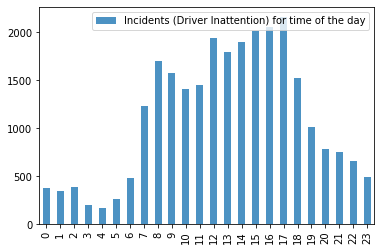

In [318]:
timeoftheday_drv_inatt_df = initial_drv_df
timeoftheday_drv_inatt_df.drop(timeoftheday_drv_inatt_df[timeoftheday_drv_inatt_df['INATTENTIONIND'] < 1].index, inplace = True)
timeoftheday_drv_inatt_df.drop(timeoftheday_drv_inatt_df[timeoftheday_drv_inatt_df['INCDTTM'] == 25].index, inplace = True)

order = [i for i in range(0,24)]
ax = timeoftheday_drv_inatt_df.INCDTTM.value_counts().loc[order].plot(kind='bar', alpha=0.8)
ax.legend(['Incidents (Driver Inattention) for time of the day'])

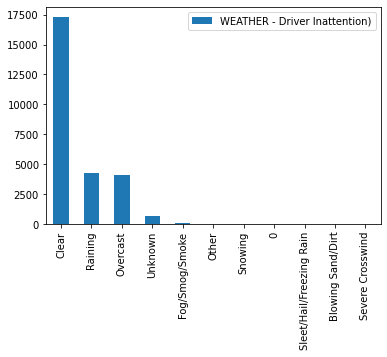

In [319]:
ax = timeoftheday_drv_inatt_df.WEATHER.value_counts().plot(kind='bar')
ax.legend(['WEATHER - Driver Inattention)'])

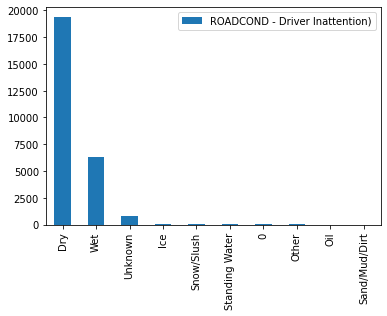

In [320]:
ax = timeoftheday_drv_inatt_df.ROADCOND.value_counts().plot(kind='bar')
ax.legend(['ROADCOND - Driver Inattention)'])

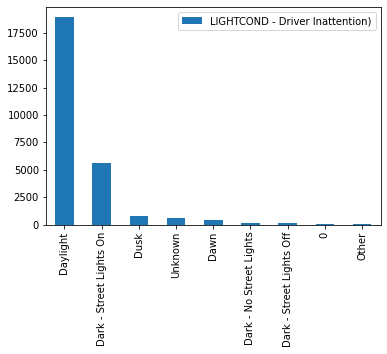

In [321]:
ax = timeoftheday_drv_inatt_df.LIGHTCOND.value_counts().plot(kind='bar')
ax.legend(['LIGHTCOND - Driver Inattention)'])

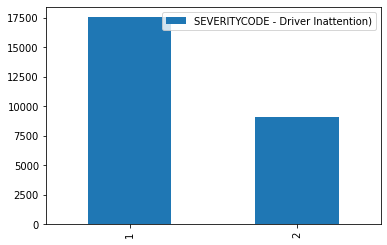

In [322]:
ax = timeoftheday_drv_inatt_df.SEVERITYCODE.value_counts().plot(kind='bar')
ax.legend(['SEVERITYCODE - Driver Inattention)'])

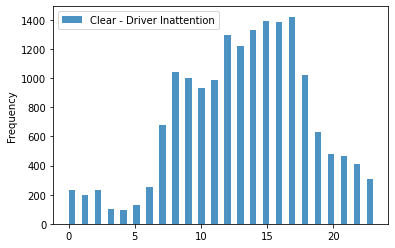

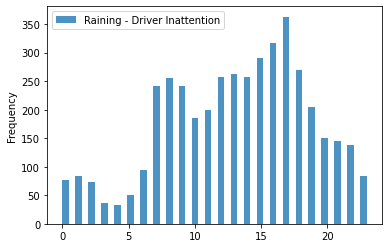

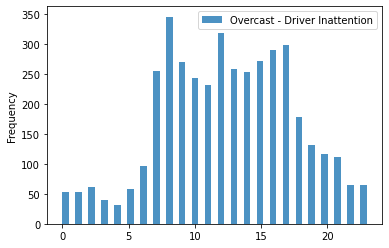

In [324]:
# Let's look at the incident time for each weather
timeoftheday_weather_drv_df = timeoftheday_drv_inatt_df[['INCDTTM', 'WEATHER']]

for weather in ['Clear', 'Raining', 'Overcast']:
    timeoftheday_wthr_drv_df = timeoftheday_weather_drv_df
    timeoftheday_wthr_drv_df = timeoftheday_wthr_drv_df[timeoftheday_wthr_drv_df['WEATHER'] == weather]
    ax7 = timeoftheday_wthr_drv_df.plot(kind='hist', bins=47, alpha=0.8)
    ax7.legend([weather + ' - Driver Inattention'])

### Speeding

In [325]:
initial_drv_df.SPEEDING.value_counts()

0    26003
1      631
Name: SPEEDING, dtype: int64

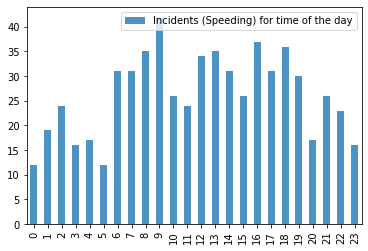

In [326]:
timeoftheday_drv_spd_df = initial_drv_df
timeoftheday_drv_spd_df.drop(timeoftheday_drv_spd_df[timeoftheday_drv_spd_df['SPEEDING'] < 1].index, inplace = True)
timeoftheday_drv_spd_df.drop(timeoftheday_drv_spd_df[timeoftheday_drv_spd_df['INCDTTM'] == 25].index, inplace = True)

order = [i for i in range(0,24)]
ax = timeoftheday_drv_spd_df.INCDTTM.value_counts().loc[order].plot(kind='bar', alpha=0.8)
ax.legend(['Incidents (Speeding) for time of the day'])

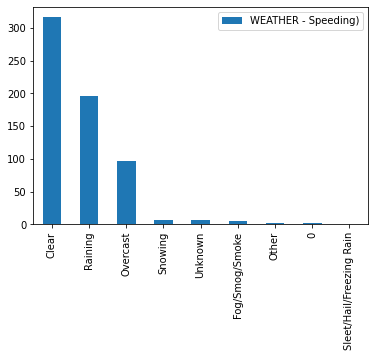

In [327]:
ax = timeoftheday_drv_spd_df.WEATHER.value_counts().plot(kind='bar')
ax.legend(['WEATHER - Speeding)'])

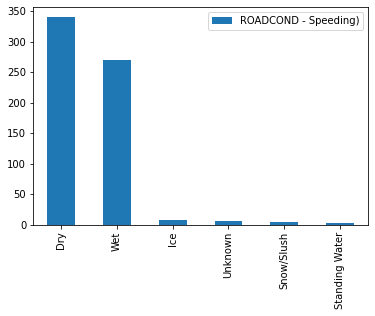

In [328]:
ax = timeoftheday_drv_spd_df.ROADCOND.value_counts().plot(kind='bar')
ax.legend(['ROADCOND - Speeding)'])

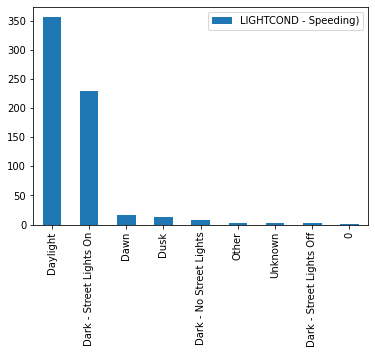

In [329]:
ax = timeoftheday_drv_spd_df.LIGHTCOND.value_counts().plot(kind='bar')
ax.legend(['LIGHTCOND - Speeding)'])

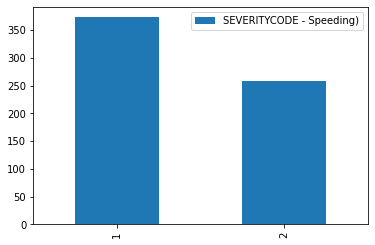

In [330]:
ax = timeoftheday_drv_spd_df.SEVERITYCODE.value_counts().plot(kind='bar')
ax.legend(['SEVERITYCODE - Speeding)'])

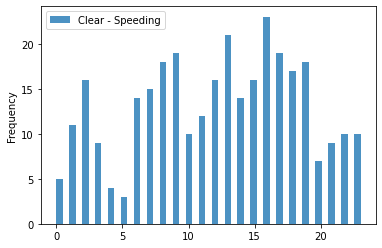

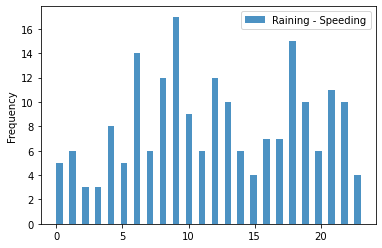

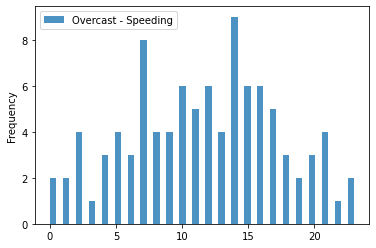

In [332]:
# Let's look at the incident time for each weather
timeoftheday_weather_drv_df = timeoftheday_drv_spd_df[['INCDTTM', 'WEATHER']]

for weather in ['Clear', 'Raining', 'Overcast']:
    timeoftheday_wthr_drv_df = timeoftheday_weather_drv_df
    timeoftheday_wthr_drv_df = timeoftheday_wthr_drv_df[timeoftheday_wthr_drv_df['WEATHER'] == weather]
    ax7 = timeoftheday_wthr_drv_df.plot(kind='hist', bins=47, alpha=0.8)
    ax7.legend([weather + ' - Speeding'])

## Model creation for Driver Under Influence cases

In [340]:
initial_drv_df.SEVERITYCODE.value_counts()

1    78034
2    33539
Name: SEVERITYCODE, dtype: int64

In [341]:
timeoftheday_drv_infl_df = initial_drv_df
timeoftheday_drv_infl_df.drop(timeoftheday_drv_infl_df[timeoftheday_drv_infl_df['UNDERINFL'] < 1].index, inplace = True)
timeoftheday_drv_infl_df.SEVERITYCODE.value_counts()

1    5549
2    3508
Name: SEVERITYCODE, dtype: int64

Now we could use Oversampling (Up-sampling) of the minority cases, so our dataset would be ballanced

In [342]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = timeoftheday_drv_infl_df[timeoftheday_drv_infl_df['SEVERITYCODE'] == 1]
df_minority = timeoftheday_drv_infl_df[timeoftheday_drv_infl_df['SEVERITYCODE'] == 2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,        # sample with replacement
                                 n_samples=5549,     # to match majority class
                                 random_state=123)    # reproducible results
 
# Combine majority class with upsampled minority class
df_drv_balanced = pd.concat([df_majority, df_minority_upsampled])

In [343]:
df_drv_balanced.SEVERITYCODE.value_counts()

2    5549
1    5549
Name: SEVERITYCODE, dtype: int64

In [346]:
df_drv_balanced.drop(df_drv_balanced[(df_drv_balanced['WEATHER'] == 'Unknown') | (df_drv_balanced['WEATHER'] == 'Other') | (df_drv_balanced['WEATHER'] == 0)].index, inplace = True)
df_drv_balanced.drop(df_drv_balanced[(df_drv_balanced['ROADCOND'] == 'Unknown') | (df_drv_balanced['ROADCOND'] == 'Other') | (df_drv_balanced['ROADCOND'] == 0)].index, inplace = True)
df_drv_balanced.drop(df_drv_balanced[(df_drv_balanced['LIGHTCOND'] == 'Unknown') | (df_drv_balanced['LIGHTCOND'] == 'Other') | (df_drv_balanced['LIGHTCOND'] == 0)].index, inplace = True)

Let's use K-Nearest Neighbors

In [348]:
X = df_drv_balanced[['INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND']].values
X[0:5]

array([[20, 'Clear', 'Dry', 'Dark - Street Lights On'],
       [18, 'Clear', 'Dry', 'Dusk'],
       [23, 'Clear', 'Dry', 'Dark - Street Lights On'],
       [21, 'Clear', 'Dry', 'Dark - Street Lights On'],
       [3, 'Overcast', 'Dry', 'Dark - Street Lights On']], dtype=object)

In [349]:
from sklearn import preprocessing
le_weather = preprocessing.LabelEncoder()
le_weather.fit(['Clear','Raining', 'Overcast', 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'])
X[:,1] = le_weather.transform(X[:,1]) 


le_road_cond = preprocessing.LabelEncoder()
le_road_cond.fit(['Dry', 'Wet', 'Ice', 'Snow/Slush', 'Oil', 'Sand/Mud/Dirt', 'Standing Water'])
X[:,2] = le_road_cond.transform(X[:,2])


le_light_cond = preprocessing.LabelEncoder()
le_light_cond.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting'])
X[:,3] = le_light_cond.transform(X[:,3]) 

X[0:5]

array([[20, 1, 0, 2],
       [18, 1, 0, 6],
       [23, 1, 0, 2],
       [21, 1, 0, 2],
       [3, 3, 0, 2]], dtype=object)

In [355]:
y = df_drv_balanced['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

Let's normalize the data.  
Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases

In [353]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.64, -0.69, -0.65, -0.52],
       [ 0.43, -0.69, -0.65,  2.32],
       [ 0.97, -0.69, -0.65, -0.52],
       [ 0.75, -0.69, -0.65, -0.52],
       [-1.17,  0.53, -0.65, -0.52]])

In [356]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8740, 4) (8740,)
Test set: (2186, 4) (2186,)


Let's find the best K number for that model

In [357]:
Ks = 250
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
    
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.541171088746569 with k = 18


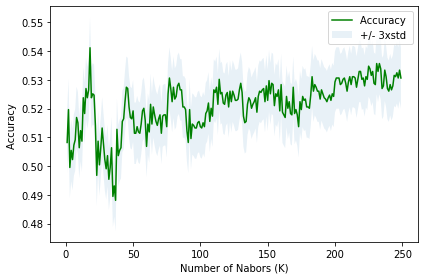

In [358]:
# Plot model accuracy for Different number of Neighbors
    
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [359]:
k = 18
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

# we can use the model to predict the test set
yhat = neigh.predict(X_test)
yhat[0:10]

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 1], dtype=int64)

In [360]:
# Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5469107551487414
Test set Accuracy:  0.541171088746569


In [363]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
knn_yhat = neigh.predict(X_test)
knn_f1 = f1_score(y_test, yhat, average='weighted')
knn_js = jaccard_score(y_test, yhat)
print('KNN F1-score:', knn_f1)
print('KNN Jaccard:', knn_js)

KNN F1-score: 0.5327056193723535
KNN Jaccard: 0.4288154897494305


## Support Vector Machine

Let's find best parameters for Support Vector Machine

In [364]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
# Evaluate which are the parameter that max result.
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
params_svm = {    
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma' : ['scale', 'auto'],
            'decision_function_shape' : ['ovo', 'ovr']      
            }

t = GridSearchCV(svm.SVC(), params_svm)
t.fit(X_train, y_train)

print("The best accuaracy was ", t.best_score_," with parameters: ", t.best_params_)

The best accuaracy was  0.5272311212814645  with parameters:  {'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


In [365]:
clf = svm.SVC(kernel='linear', gamma='scale', decision_function_shape='ovo')
clf.fit(X_train, y_train) 
yhat_svm = clf.predict(X_test)
yhat_svm

array([2, 1, 2, ..., 1, 1, 2], dtype=int64)

In [366]:
svm_f1 = f1_score(y_test, yhat_svm, average='weighted')
svm_js = jaccard_score(y_test, yhat_svm)
print('SVM F1-score:', svm_f1)
print('SVM Jaccard:', svm_js)

SVM F1-score: 0.5213437593004693
SVM Jaccard: 0.3018354860639021
